# Customer Churn Analysis:

Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Read csv data as dataframe(df):

In [2]:
df=pd.read_csv('customer churn analysis data')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#From above infoformation, the given dataset contains 1 floate, 2 int, and 18 object datatype.
#Dataset contains 7043 rows and 21 columns.
#The data is correct as i have confirmed it using df.tail() and df.head() code.

# Checking for null values:

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.isnull().sum().sum()

0

Given data do not have any null value.

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Visualization:

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64


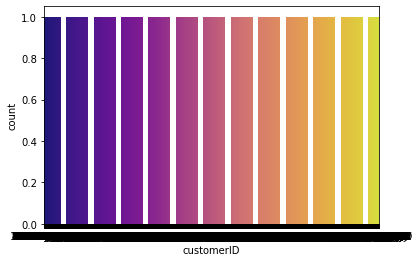

In [14]:
print(df['customerID'].value_counts())
sns.countplot(x='customerID',data=df,palette='plasma')
plt.show()

Male      3555
Female    3488
Name: gender, dtype: int64


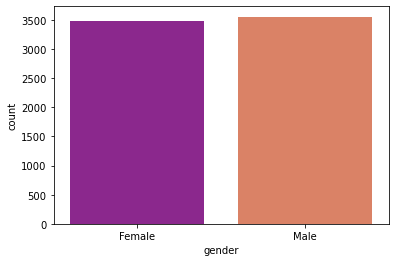

In [15]:
print(df['gender'].value_counts())
sns.countplot(x='gender',data=df,palette='plasma')
plt.show()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


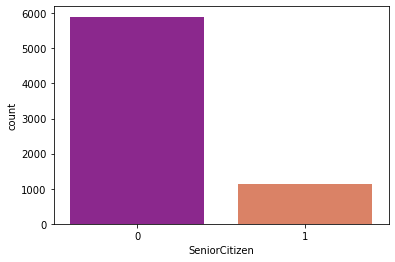

In [16]:
print(df['SeniorCitizen'].value_counts())
sns.countplot(x='SeniorCitizen',data=df,palette='plasma')
plt.show()

No     3641
Yes    3402
Name: Partner, dtype: int64


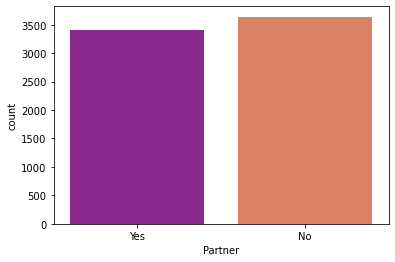

In [17]:
print(df['Partner'].value_counts())
sns.countplot(x='Partner',data=df,palette='plasma')
plt.show()

No     4933
Yes    2110
Name: Dependents, dtype: int64


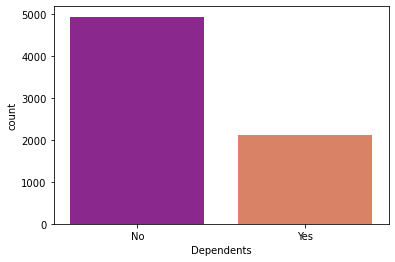

In [18]:
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df,palette='plasma')
plt.show()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


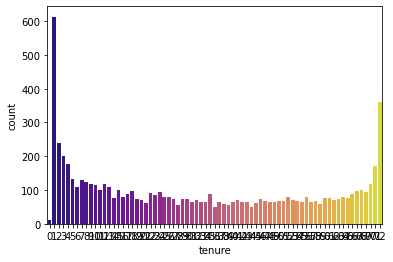

In [19]:
print(df['tenure'].value_counts())
sns.countplot(x='tenure',data=df,palette='plasma')
plt.show()

Yes    6361
No      682
Name: PhoneService, dtype: int64


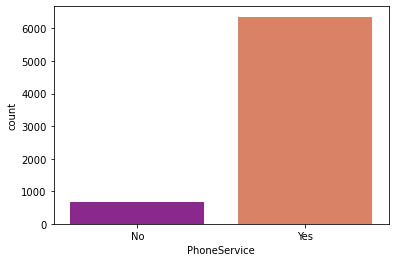

In [20]:
print(df['PhoneService'].value_counts())
sns.countplot(x='PhoneService',data=df,palette='plasma')
plt.show()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


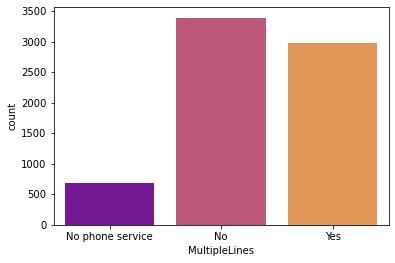

In [21]:
print(df['MultipleLines'].value_counts())
sns.countplot(x='MultipleLines',data=df,palette='plasma')
plt.show()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


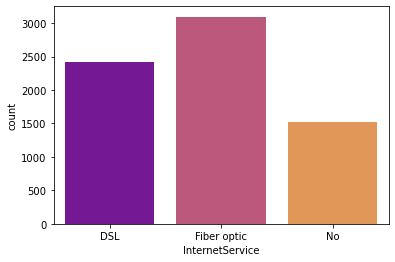

In [22]:
print(df['InternetService'].value_counts())
sns.countplot(x='InternetService',data=df,palette='plasma')
plt.show()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


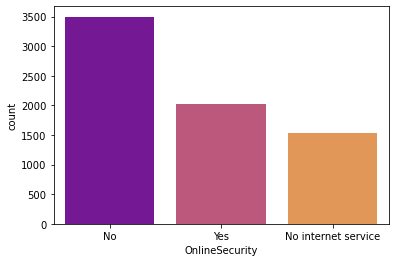

In [24]:
print(df['OnlineSecurity'].value_counts())
sns.countplot(x='OnlineSecurity',data=df,palette='plasma')
plt.show()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


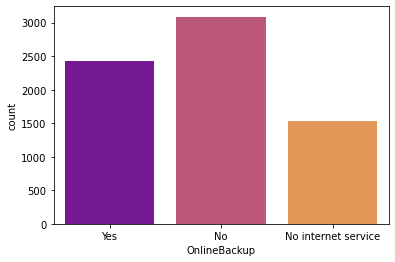

In [25]:
print(df['OnlineBackup'].value_counts())
sns.countplot(x='OnlineBackup',data=df,palette='plasma')
plt.show()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


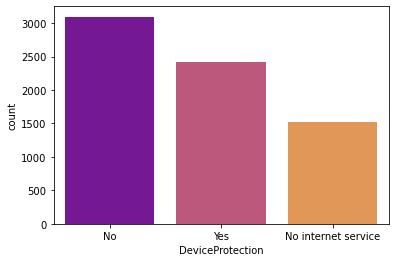

In [27]:
print(df['DeviceProtection'].value_counts())
sns.countplot(x='DeviceProtection',data=df,palette='plasma')
plt.show()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


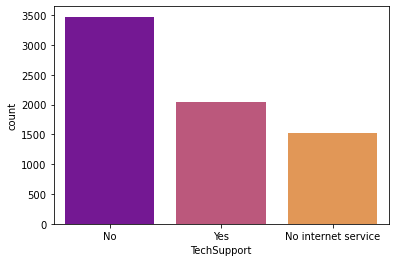

In [28]:
print(df['TechSupport'].value_counts())
sns.countplot(x='TechSupport',data=df,palette='plasma')
plt.show()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


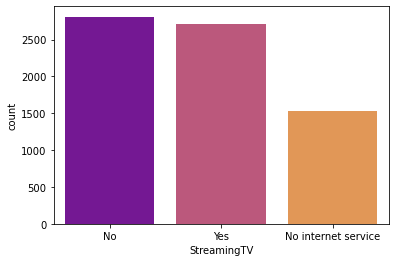

In [29]:
print(df['StreamingTV'].value_counts())
sns.countplot(x='StreamingTV',data=df,palette='plasma')
plt.show()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


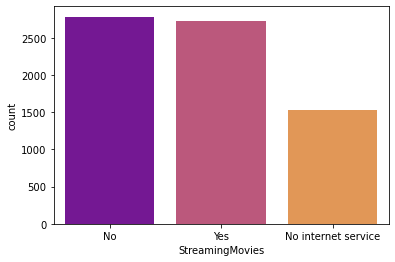

In [30]:
print(df['StreamingMovies'].value_counts())
sns.countplot(x='StreamingMovies',data=df,palette='plasma')
plt.show()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


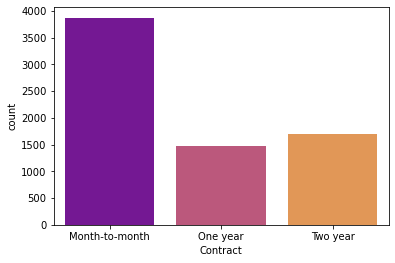

In [31]:
print(df['Contract'].value_counts())
sns.countplot(x='Contract',data=df,palette='plasma')
plt.show()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


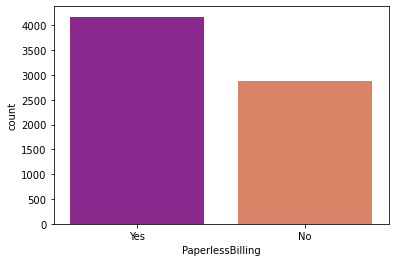

In [32]:
print(df['PaperlessBilling'].value_counts())
sns.countplot(x='PaperlessBilling',data=df,palette='plasma')
plt.show()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


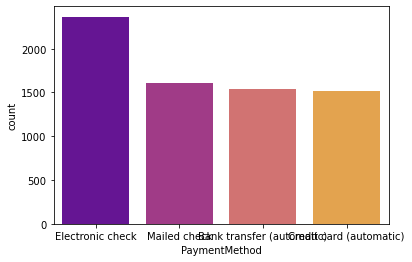

In [33]:
print(df['PaymentMethod'].value_counts())
sns.countplot(x='PaymentMethod',data=df,palette='plasma')
plt.show()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64


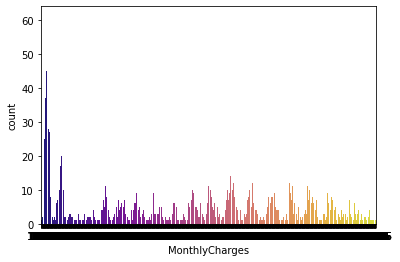

In [34]:
print(df['MonthlyCharges'].value_counts())
sns.countplot(x='MonthlyCharges',data=df,palette='plasma')
plt.show()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64


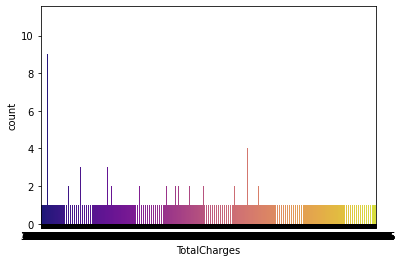

In [35]:
print(df['TotalCharges'].value_counts())
sns.countplot(x='TotalCharges',data=df,palette='plasma')
plt.show()

No     5174
Yes    1869
Name: Churn, dtype: int64


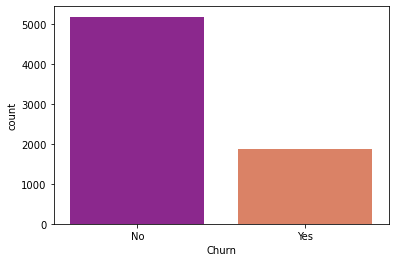

In [36]:
print(df['Churn'].value_counts())
sns.countplot(x='Churn',data=df,palette='plasma')
plt.show()

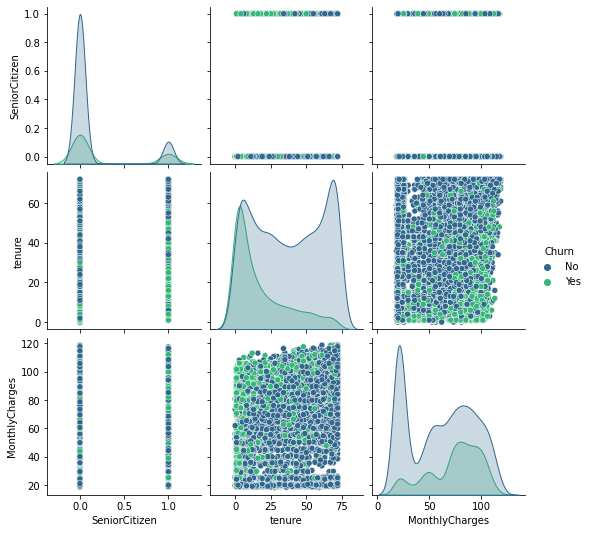

In [38]:
#Pairplot for target

sns.pairplot(df,hue="Churn",palette='viridis')

# Checking skewness:

In [40]:
#Different types of variables are Categorical, ordinal, and numerical.

num_cols=["MonthlyCharges","TotalCharges","SeniorCitizen","tenure"]
cat_cols=["gender", "Partner", "Dependents", "PhoneService", "MultipleLines","OnlineSecurity",
          "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
         "PaperlessBilling","Churn","InternetService", "PaymentMethod","Contract"]

In [42]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

In [43]:
cat_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_cols.append(i)
print(cat_cols)

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [44]:
#Encoding using Ordinal encoder

from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in cat_cols:
    df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [45]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1597.0,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,5698.0,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,2994.0,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,2660.0,1.0


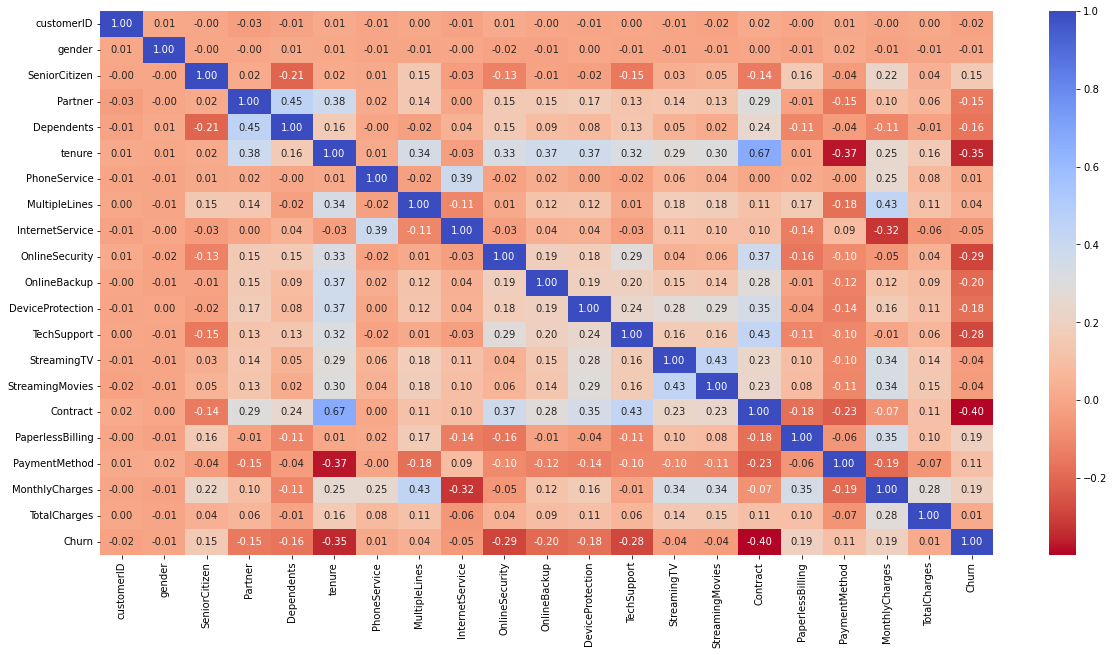

In [46]:
#Correlation Heat map

corr = df.corr()
plt.figure(figsize=(20,10), facecolor='white')
sns.heatmap(corr, annot=True,cmap='coolwarm_r',fmt='.2f')
plt.show()

In [47]:
#Multicolinearity is present in the dataset
#Our target variable has the highest correlation with Contract followed by tenure.
#Our target variable has least correlation with Gender and PhoneService

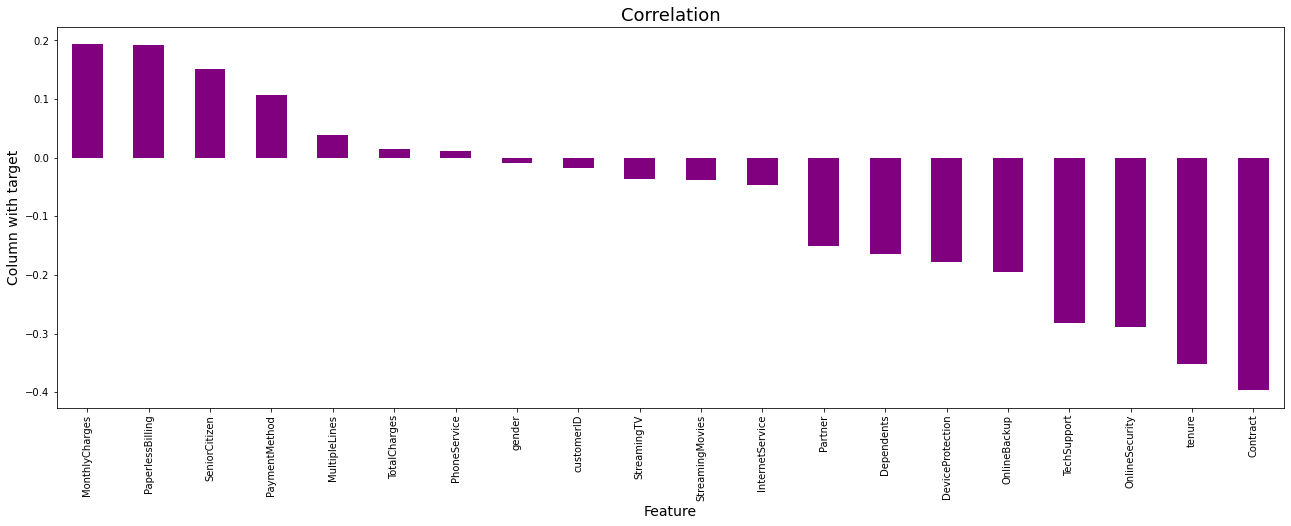

In [48]:
#Visualization of correlation:

plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='purple')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Column with target",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

In [49]:
#Most correlated with MonthlyCharges, Paperless billing, Contract, tenure and Online Security.
#Least Correlated with gender, PhoneService.

In [50]:
x = df.drop("Churn",axis=1)
y = df["Churn"]

In [51]:
x.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0


In [52]:
x.shape

(7043, 20)

In [53]:
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Churn, dtype: float64

In [54]:
y.shape

(7043,)

In [55]:
#using Standard scaler to normalize the data

from sklearn.preprocessing import StandardScaler

ssc=StandardScaler()

x= pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

In [56]:
x

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.911890,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.398608
1,0.216906,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.948762
2,-0.470701,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.641883
3,0.990587,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.983710
4,1.470632,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.235224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655145,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,-0.879397
7039,-0.981733,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.292099
7040,-0.075745,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.139680
7041,1.186835,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.316534


In [57]:
#Checking Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [58]:

vif_calc()

    VIF Factor          features
0     1.002435        customerID
1     1.001719            gender
2     1.149739     SeniorCitizen
3     1.461981           Partner
4     1.382218        Dependents
5     2.754763            tenure
6     1.622292      PhoneService
7     1.392868     MultipleLines
8     1.826783   InternetService
9     1.248006    OnlineSecurity
10    1.186400      OnlineBackup
11    1.280351  DeviceProtection
12    1.303611       TechSupport
13    1.443673       StreamingTV
14    1.442829   StreamingMovies
15    2.475214          Contract
16    1.203898  PaperlessBilling
17    1.181360     PaymentMethod
18    2.830601    MonthlyCharges
19    1.108741      TotalCharges


In [59]:
#Droping highly VIF column

x = x.drop(["TotalCharges"],axis=1)

In [60]:
vif_calc()

    VIF Factor          features
0     1.002428        customerID
1     1.001718            gender
2     1.149640     SeniorCitizen
3     1.461971           Partner
4     1.382123        Dependents
5     2.754697            tenure
6     1.622284      PhoneService
7     1.391687     MultipleLines
8     1.825990   InternetService
9     1.247812    OnlineSecurity
10    1.185973      OnlineBackup
11    1.280227  DeviceProtection
12    1.303607       TechSupport
13    1.443673       StreamingTV
14    1.442619   StreamingMovies
15    2.460025          Contract
16    1.202921  PaperlessBilling
17    1.180965     PaymentMethod
18    2.733037    MonthlyCharges


0.0    5174
1.0    1869
Name: Churn, dtype: int64


<AxesSubplot:xlabel='Churn', ylabel='count'>

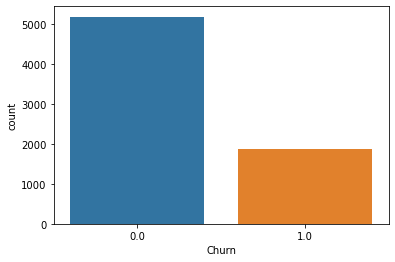

In [61]:
#Checking the count of Loan_Status

print(y.value_counts())
sns.countplot(y)

In [62]:
#Importing SMOTE and using it to balance

from imblearn.over_sampling import SMOTE

smt = SMOTE()
x,y = smt.fit_resample(x,y)

0.0    5174
1.0    5174
Name: Churn, dtype: int64


<AxesSubplot:xlabel='Churn', ylabel='count'>

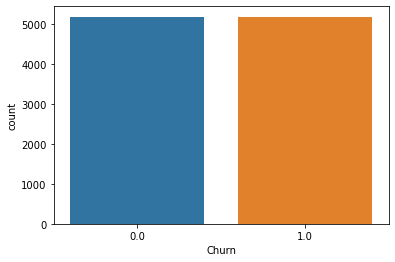

In [63]:
#Rechecking the count of Loan_Status

print(y.value_counts())
sns.countplot(y)

# Models:

In [64]:
#Importing Ml Libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score, confusion_matrix, \
precision_score, f1_score, accuracy_score, classification_report

# Logistic Regression:

In [65]:
#Finding the Best Random State

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.7900161030595814  on Random_state  92


In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

lr=LogisticRegression()

lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_lr=lr.predict(x_test)
print('Accuracy score of Logistic Regression is:')
print(accuracy_score(y_test,pred_lr))
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

Accuracy score of Logistic Regression is:
0.7900161030595814
[[1181  389]
 [ 263 1272]]
              precision    recall  f1-score   support

         0.0       0.82      0.75      0.78      1570
         1.0       0.77      0.83      0.80      1535

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



In [67]:
#HyperParameter Tuning of LR

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

lr_grid_param={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'penalty':['none', 'elasticnet', 'l1', 'l2'],
               'C':[0.001, 0.01, 0.1, 1, 10, 100]}

gd_sr=GridSearchCV(estimator=lr,param_grid=lr_grid_param,cv=5,verbose=0)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'C': 0.001, 'penalty': 'none', 'solver': 'newton-cg'}
0.7755153017981101


In [68]:
#Reinstating the tuned parameters:


lr=LogisticRegression(C=0.01,solver='newton-cg',penalty='l2')

lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print('Accuracy score of Logistic Regression is:')
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy score of Logistic Regression is:
0.7916264090177134
[[1178  392]
 [ 255 1280]]
              precision    recall  f1-score   support

         0.0       0.82      0.75      0.78      1570
         1.0       0.77      0.83      0.80      1535

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



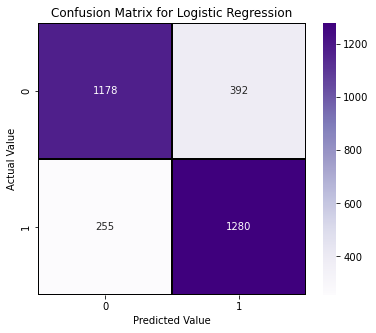

In [69]:
#Plotting the confusion Matrix,took predicted values from model without hyperparameter tuning

cm = confusion_matrix(y_test, predlr)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Decision Tree Classifier:

In [70]:
#Finding the best Randomstate:

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    pred = dt.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8048309178743961  on Random_state  40


In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

0.8022544283413848
[[1205  303]
 [ 311 1286]]
              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80      1508
         1.0       0.81      0.81      0.81      1597

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



In [72]:
#HyperParameter Tuning for DTC

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

dtc= DecisionTreeClassifier()
dt_grid_param={'criterion':['gini','entropy'],
             'max_depth':np.arange(0,50),
             'max_features':["auto","sqrt","log2"],
             'max_leaf_nodes':[10,20,30],'min_samples_leaf': [5, 10, 20, 50, 100]}

gd_sr=GridSearchCV(estimator=dtc,param_grid=dt_grid_param,scoring='accuracy',cv=5,verbose=0)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(gd_sr)
print(gd_sr.best_score_)
print(gd_sr.best_estimator_)
print(gd_sr.best_params_)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy')
0.7850855158855243
DecisionTreeClassifier(max_depth=32, max_features='log2', max_leaf_nodes=30,
                       min_samples_leaf=5)
{'criterion': 'gini', 'max_depth': 32, 'max_features': 'log2', 'max_leaf_nodes': 30, 'min_samples_leaf': 5}


In [73]:
#Reinstating the tuned parameters:

dtc_H=DecisionTreeClassifier(criterion='gini',max_depth=36,max_features='auto',
                           max_leaf_nodes=30, min_samples_leaf=5)
dtc_H.fit(x_train,y_train)
dtc_H.score(x_train,y_train)
preddtc=dtc_H.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.792914653784219
[[1202  306]
 [ 337 1260]]
              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79      1508
         1.0       0.80      0.79      0.80      1597

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



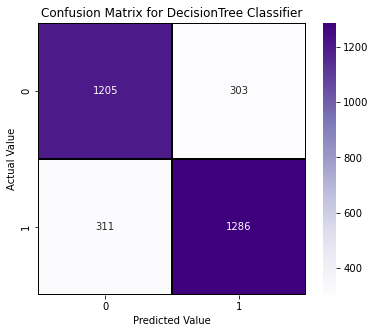

In [74]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test, pred_dtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for DecisionTree Classifier')
plt.show()

# SVC:

In [75]:
#Finding the best random state:

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    sv=SVC()
    sv.fit(x_train, y_train)
    pred = sv.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.822866344605475  on Random_state  59


In [76]:
 #Calling each kernel by defining svmkernel:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state = RS)

def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [77]:
svmkernel('linear')

0.7835748792270532
[[1128  404]
 [ 268 1305]]
              precision    recall  f1-score   support

         0.0       0.81      0.74      0.77      1532
         1.0       0.76      0.83      0.80      1573

    accuracy                           0.78      3105
   macro avg       0.79      0.78      0.78      3105
weighted avg       0.79      0.78      0.78      3105



In [78]:
svmkernel('poly')

0.8048309178743961
[[1182  350]
 [ 256 1317]]
              precision    recall  f1-score   support

         0.0       0.82      0.77      0.80      1532
         1.0       0.79      0.84      0.81      1573

    accuracy                           0.80      3105
   macro avg       0.81      0.80      0.80      3105
weighted avg       0.81      0.80      0.80      3105



In [79]:
svmkernel('rbf')

0.822866344605475
[[1231  301]
 [ 249 1324]]
              precision    recall  f1-score   support

         0.0       0.83      0.80      0.82      1532
         1.0       0.81      0.84      0.83      1573

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



In [80]:
#Hyperparameter tuning of SVC for better accuracy:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

sv=SVC()
sv_grid_param={'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

gd_sr=GridSearchCV(estimator=sv,param_grid=sv_grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.8937052836559005


In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=79)
svc_h=SVC(kernel='rbf',gamma=1,C=10)
svc_h.fit(x_train,y_train)
svc_h.score(x_train,y_train)
pred_svc=svc_h.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.8724637681159421
[[1424  124]
 [ 272 1285]]
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      1548
         1.0       0.91      0.83      0.87      1557

    accuracy                           0.87      3105
   macro avg       0.88      0.87      0.87      3105
weighted avg       0.88      0.87      0.87      3105



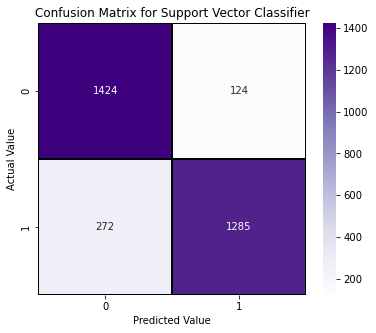

In [82]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test, pred_svc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

# Random Forest Classifier:

In [83]:
#Finding the best random state

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8689210950080515  on Random_state  42


In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8685990338164251
[[1359  215]
 [ 193 1338]]
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      1574
         1.0       0.86      0.87      0.87      1531

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



In [85]:
#Hyper Parameter Tuning for Random Forest

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

rf=RandomForestClassifier()
rf_grid_param={"max_features": [1,3,10],
                "min_samples_split":[2,3,5,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[200,300],
                "criterion":["gini",'entropy']}

gd_sr=GridSearchCV(estimator=rf,param_grid=rf_grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'bootstrap': False, 'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
0.8700336459770759


In [86]:
#Reinstating the tuned parameters:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =81)
rf_h=RandomForestClassifier(n_estimators=300,bootstrap=False,criterion='gini',
                         max_features=1,min_samples_leaf=1,min_samples_split=3)
rf_h.fit(x_train,y_train)
rf_h.score(x_train,y_train)
predrf=rf_h.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))


0.8663446054750402
[[1327  188]
 [ 227 1363]]
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      1515
         1.0       0.88      0.86      0.87      1590

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



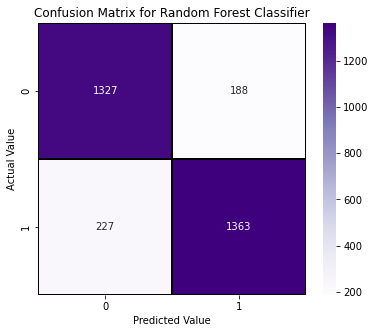

In [87]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test, predrf)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# Gradient Booster Classifier:

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =None)

GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
predgb=GBC.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, predgb))
print('Confusion Matrix:',confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

Accuracy Score: 0.8299516908212561
Confusion Matrix: [[1270  275]
 [ 253 1307]]
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83      1545
         1.0       0.83      0.84      0.83      1560

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105



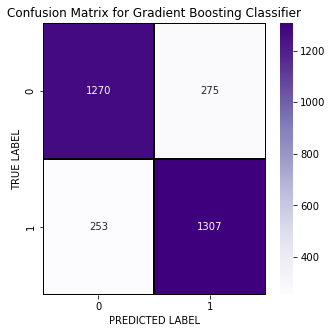

In [89]:
cm = confusion_matrix(y_test, predgb)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]


f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# cross validation:

In [90]:
score=cross_val_score(lr,x,y,cv=5)
score_a=score.mean()
print("Cross_Val_Score of LR:",score_a)

Cross_Val_Score of LR: 0.7755146480247873


In [91]:
score=cross_val_score(dtc,x,y,cv=5)
score_b=score.mean()
print("Cross_Val_Score of DTC:",score_b)

Cross_Val_Score of DTC: 0.7863440762299694


In [92]:
score=cross_val_score(svc_h,x,y,cv=5)
score_c=score.mean()
print("Cross_Val_Score of SVC:",score_c)

Cross_Val_Score of SVC: 0.8937052836559005


In [93]:
score=cross_val_score(rf_h,x,y,cv=5)
score_d=score.mean()
print("Cross_Val_Score of RF:",score_d)

Cross_Val_Score of RF: 0.8681008118463727


In [94]:
score=cross_val_score(GBC,x,y,cv=5)
score_f=score.mean()
print("Cross_Val_Score of Gradient Boosting:",score_f)

Cross_Val_Score of Gradient Boosting: 0.8343741404631985


Text(0.5, 1.0, 'Cross Validation Scores')

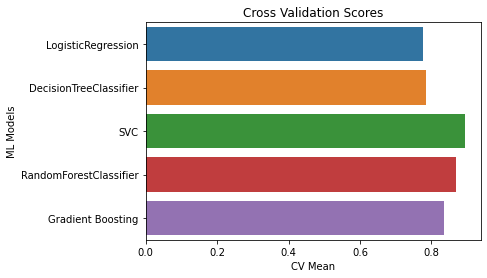

In [96]:
cv_result=[score_a,score_b,score_c,score_d,score_f]
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":[ "LogisticRegression",
            "DecisionTreeClassifier", "SVC","RandomForestClassifier","Gradient Boosting"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("CV Mean")
g.set_title("Cross Validation Scores")

Text(0.5, 1.0, 'Accuracy scores of different Models')

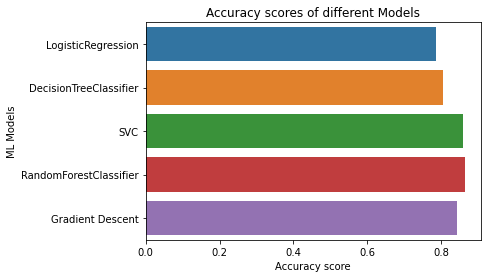

In [97]:
score_lr=0.785829307568438 
score_dtc=0.8051529790660226
score_svc=0.8605475040257649
score_rf=0.8644122383252818
score_gbc=0.8431561996779388

acc_result=[score_lr,score_dtc,score_svc,score_rf,score_gbc]
acc_results = pd.DataFrame({"Accuracy Scores":acc_result, "ML Models":[ "LogisticRegression",
            "DecisionTreeClassifier", "SVC","RandomForestClassifier","Gradient Descent"]})

g = sns.barplot("Accuracy Scores", "ML Models", data = acc_results)
g.set_xlabel("Accuracy score")
g.set_title("Accuracy scores of different Models")

In [98]:
#Final model as Random Forest
#{'bootstrap': False, 'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =81)

Final_Model=RandomForestClassifier(n_estimators=300,bootstrap=False,criterion='gini',
                         max_features=1,min_samples_leaf=1,min_samples_split=3)
Final_Model.fit(x_train,y_train)
predrf=Final_Model.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8679549114331723
[[1332  183]
 [ 227 1363]]
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87      1515
         1.0       0.88      0.86      0.87      1590

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



In [99]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob=Final_Model.predict_proba(x_test)[:,1]
y_pred_prob

array([0.15666667, 0.96166667, 0.26166667, ..., 0.95      , 0.92666667,
       0.00666667])

In [100]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.60066007e-04,
       6.60066007e-04, 6.60066007e-04, 6.60066007e-04, 6.60066007e-04,
       1.98019802e-03, 3.30033003e-03, 3.30033003e-03, 3.96039604e-03,
       3.96039604e-03, 3.96039604e-03, 3.96039604e-03, 3.96039604e-03,
       3.96039604e-03, 3.96039604e-03, 3.96039604e-03, 3.96039604e-03,
       3.96039604e-03, 3.96039604e-03, 4.62046205e-03, 4.62046205e-03,
       4.62046205e-03, 4.62046205e-03, 5.28052805e-03, 5.28052805e-03,
       5.28052805e-03, 5.28052805e-03, 5.28052805e-03, 5.28052805e-03,
       5.28052805e-03, 5.28052805e-03, 5.28052805e-03, 5.28052805e-03,
       5.28052805e-03, 5.94059406e-03, 6.60066007e-03, 6.60066007e-03,
       6.60066007e-03, 6.60066007e-03, 7.26072607e-03, 7.26072607e-03,
       7.26072607e-03, 7.92079208e-03, 7.92079208e-03, 7.92079208e-03,
       8.58085809e-03, 8.58085809e-03, 9.24092409e-03, 9.90099010e-03,
      

In [101]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.98333333e-01, 9.95000000e-01,
       9.93333333e-01, 9.91666667e-01, 9.90000000e-01, 9.88333333e-01,
       9.86666667e-01, 9.85000000e-01, 9.83333333e-01, 9.81666667e-01,
       9.80000000e-01, 9.78333333e-01, 9.76666667e-01, 9.75000000e-01,
       9.73333333e-01, 9.71666667e-01, 9.70000000e-01, 9.66666667e-01,
       9.65000000e-01, 9.63333333e-01, 9.61666667e-01, 9.60000000e-01,
       9.58333333e-01, 9.56666667e-01, 9.55000000e-01, 9.53333333e-01,
       9.51666667e-01, 9.50000000e-01, 9.48333333e-01, 9.46666667e-01,
       9.45000000e-01, 9.43333333e-01, 9.40000000e-01, 9.38333333e-01,
       9.36666667e-01, 9.35000000e-01, 9.33333333e-01, 9.31666667e-01,
       9.30000000e-01, 9.28333333e-01, 9.26666667e-01, 9.25000000e-01,
       9.23333333e-01, 9.21666667e-01, 9.20000000e-01, 9.18333333e-01,
       9.16666667e-01, 9.15000000e-01, 9.13333333e-01, 9.11666667e-01,
       9.10000000e-01, 9.08333333e-01, 9.06666667e-01, 9.05000000e-01,
      

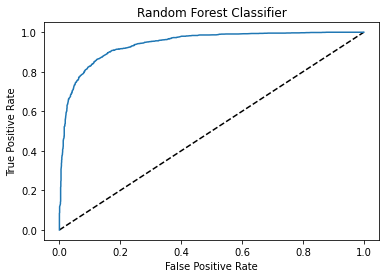

In [102]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [104]:
import joblib
joblib.dump(Final_Model,'Customer_Churn_rf.pkl')

['Customer_Churn_rf.pkl']

<AxesSubplot:>

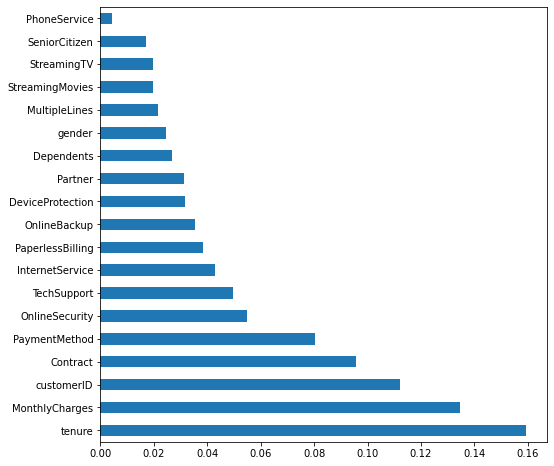

In [105]:
#Checking Feature Importance with Random Forest Model

feat_importances = pd.Series(Final_Model.feature_importances_, index=x.columns)
feat_importances.nlargest(100).plot(kind='barh',figsize=(8,8))

In [106]:
# Loading the saved model
model=joblib.load("Customer_Churn_rf.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0., 1., 0., ..., 1., 1., 0.])

In [107]:
#saving as dataframe

base = pd.DataFrame()
base["actual"] = y_test
base["predictions"] = prediction
base

,actual,predictions
3929,0.0,0.0
9287,1.0,1.0
602,0.0,0.0
7135,1.0,1.0
7365,1.0,1.0
...,...,...
5540,1.0,1.0
2853,0.0,0.0
9373,1.0,1.0
4139,0.0,1.0


In [108]:
#Adding another column of thier difference. 

base['difference']=base['actual']-base['predictions']

#If 0 then actual and predicted are same. else its different

print(base['difference'].value_counts())

 0.0    2695
 1.0     227
-1.0     183
Name: difference, dtype: int64


In [109]:
a=(419/2686)*100
a

15.5994043186895

have 15% error with this model.

# The end